In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import dataset_builder as db
ACT_LABELS = ["dws","ups", "wlk", "jog", "std", "sit"]
TRIAL_CODES = {
    ACT_LABELS[0]:[1,2,11],
    ACT_LABELS[1]:[3,4,12],
    ACT_LABELS[2]:[7,8,15],
    ACT_LABELS[3]:[9,16],
    ACT_LABELS[4]:[6,14],
    ACT_LABELS[5]:[5,13],
}

[INFO] -- Data subjects' information is imported.
[INFO] -- Creating Time-Series
[INFO] -- Test Trials: [11, 12, 13, 14, 15, 16]
[INFO] -- Data subjects' information is imported.
[INFO] -- Creating Time-Series
[INFO] -- Test Trials: [11, 12, 13, 14, 15, 16]


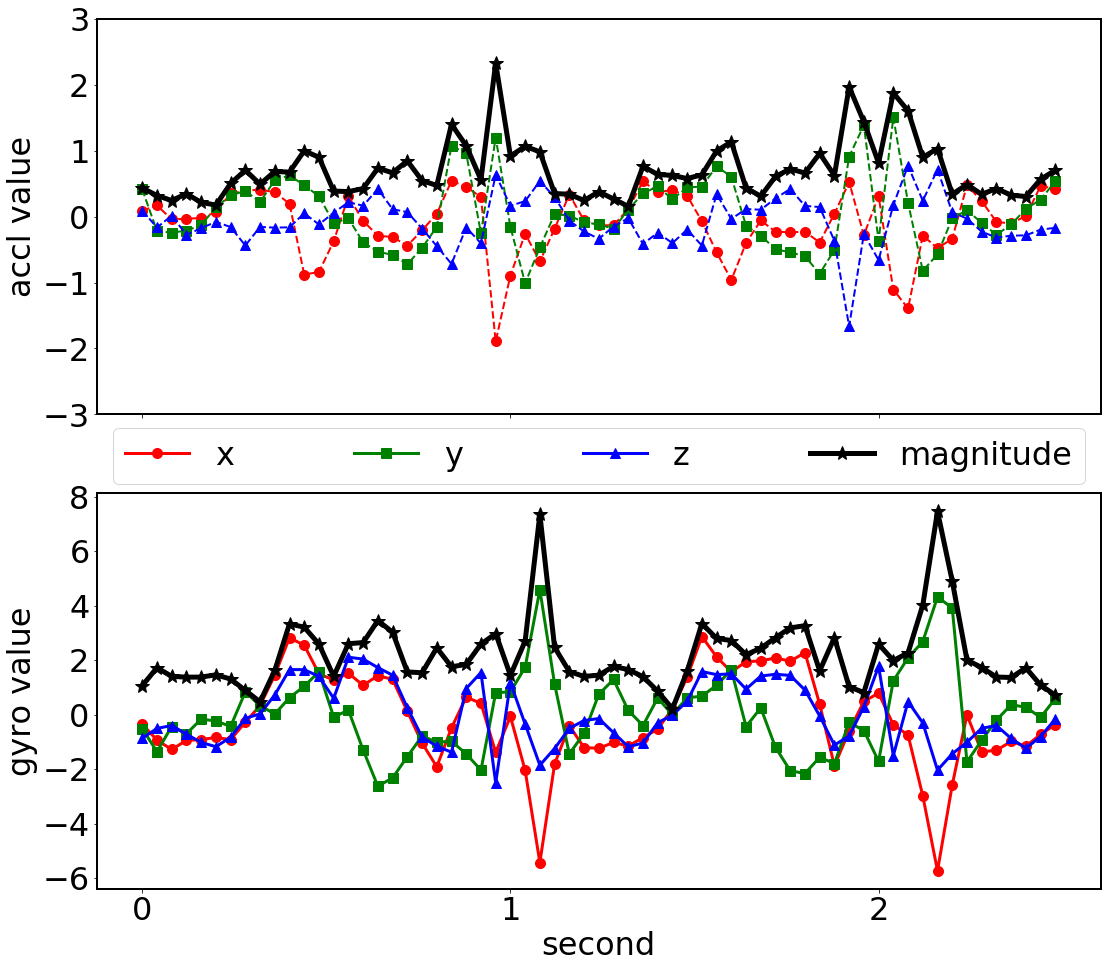

In [3]:
plt.rcParams['figure.figsize'] = (18,16)
plt.rcParams['font.size'] = 32
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2
period = 2.5 # Seconds
sample_rate = 50 # Hz
points = int(period*sample_rate)
act_data = np.zeros((6,points))
clr1 = ["rs-","r*-","ro-","rv-","rp-","r^-"]
clr2 = ["bs-","b*-","bo-","bv-","bp-","b^-"]

act_lbl = ["Sat", "Stand-Up", "Downstairs", "Upstairs", "Walking", "Jogging"]
lbl = ["Gyro", "Accl"]
fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
act = 2 # Walking
uid = 0 # User number 0

##############################################################################################################
## Here we set parameter to build labeld time-series from dataset of "(A)DeviceMotion_data"
## attitude(roll, pitch, yaw); gravity(x, y, z); rotationRate(x, y, z); userAcceleration(x,y,z)
sdt = ["userAcceleration"]
act_labels = ACT_LABELS [0:6]
trial_codes = [TRIAL_CODES[act] for act in act_labels]
dt_list = db.set_data_types(sdt)
dataset = db.creat_time_series(dt_list, act_labels, trial_codes, mode="raw", labeled=True, combine_grav_acc=False)

test_trail = [11,12,13,14,15,16]  
print("[INFO] -- Test Trials: "+str(test_trail))
test_ts = dataset.loc[(dataset['trial'].isin(test_trail))]
train_ts = dataset.loc[~(dataset['trial'].isin(test_trail))]

data = train_ts[(train_ts["id"] == uid) & (train_ts["act"] == act)]
dx = ((data[str(dt_list[0][0])]).values)[:points]
dy = ((data[str(dt_list[0][1])]).values)[:points]
dz = ((data[str(dt_list[0][2])]).values)[:points]
ax[0].plot(np.arange(0.,125./50.,1./50)[::2][:], dx[::2][:], "ro--", linewidth=2, label = "x",markersize=10)
ax[0].plot(np.arange(0.,125./50.,1./50)[::2][:], dy[::2][:], "gs--", linewidth=2, label = "y",markersize=10)
ax[0].plot(np.arange(0.,125./50.,1./50)[::2][:], dz[::2][:], "b^--", linewidth=2, label = "z",markersize=10)
ax[0].plot(np.arange(0.,125./50.,1./50)[::2][:], (((dx**2)+(dy**2)+(dz**2))**.5)[::2][:], "k*-", linewidth=5,markersize=15, label = "magnitude")
#ax[0].set_title("accl")
#ax[0].legend(loc="lower right", mode="expand",ncol=4, fontsize=22)
ax[0].set(ylabel='accl value')
plt.setp(ax[0], xticks=np.arange(0.,125./50.,1.), yticks=np.arange(-3., 4., 1.))


##############################################################################################################

sdt = ["rotationRate"]
act_labels = ACT_LABELS [0:6]
trial_codes = [TRIAL_CODES[act] for act in act_labels]
dt_list = db.set_data_types(sdt)
dataset = db.creat_time_series(dt_list, act_labels, trial_codes, mode="raw", labeled=True, combine_grav_acc=False)

test_trail = [11,12,13,14,15,16]  
print("[INFO] -- Test Trials: "+str(test_trail))
test_ts = dataset.loc[(dataset['trial'].isin(test_trail))]
train_ts = dataset.loc[~(dataset['trial'].isin(test_trail))]

data = train_ts[(train_ts["id"] == uid) & (train_ts["act"] == act)]
dx = ((data[str(dt_list[0][0])]).values)[:points]
dy = ((data[str(dt_list[0][1])]).values)[:points]
dz = ((data[str(dt_list[0][2])]).values)[:points]
ax[1].plot(np.arange(0.,125./50.,1./50)[::2], dx[::2][:], "ro-", linewidth=3, label = "x", markersize=10)
ax[1].plot(np.arange(0.,125./50.,1./50)[::2], dy[::2][:], "gs-", linewidth=3, label = "y", markersize=10)
ax[1].plot(np.arange(0.,125./50.,1./50)[::2], dz[::2][:], "b^-", linewidth=3, label = "z", markersize=10)
ax[1].plot(np.arange(0.,125./50.,1./50)[::2], (((dx**2)+(dy**2)+(dz**2))**.5)[::2][:], "k*-", linewidth=5, markersize=15, label = "magnitude")
ax[1].set(xlabel = "second", ylabel='gyro value')        
plt.setp(ax[1], xticks=np.arange(0.,125./50.,1.), yticks=np.arange(-6., 8.1, 2.))
ax[1].legend(bbox_to_anchor=(0., 1.02, 1., .15),loc="center", mode="expand",ncol=4)
